In [1]:
%%loadFromPOM
<repository>
    <id>bintray-ruivieira-maven</id>
    <url>https://dl.bintray.com/ruivieira/maven</url>
</repository>
<dependency>
    <groupId>org.ruivieira</groupId>
    <artifactId>java-plotlib</artifactId>
    <version>0.0.8</version>
</dependency>
<dependency>
    <groupId>org.ruivieira</groupId>
    <artifactId>jssm</artifactId>
    <version>0.0.4</version>
</dependency>

In [2]:
import org.ruivieira.jssm.common.Structure;
import org.apache.commons.math3.linear.RealVector;
import org.apache.commons.math3.linear.ArrayRealVector;
import org.ruivieira.jssm.univariate.*;

int nobs = 100;

Structure structure = UnivariateStructure.createLocallyConstant();

RealVector[] states = StageGenerator.states(nobs, structure, new ArrayRealVector(1));
RealVector[] observations = ObservationGenerator.gaussian(states, structure, 1.0);

In [8]:
import java.util.stream.Collectors;
import java.util.stream.IntStream;

List<Double> _states = Arrays.stream(states).map(s -> s.getEntry(0)).collect(Collectors.toList());
List<Double> _observations = Arrays.stream(observations).map(s -> s.getEntry(0)).collect(Collectors.toList());
List<Integer> x = IntStream.range(0, 100).boxed().collect(Collectors.toList())

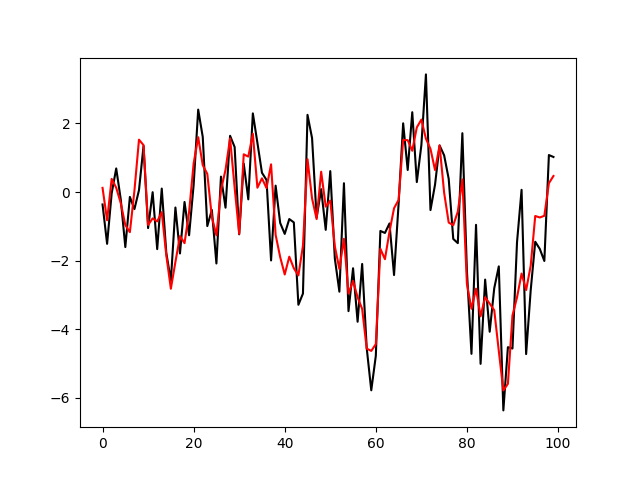

In [11]:
import org.ruivieira.plotlib.Figure;
import org.ruivieira.plotlib.plots.LinePlot;
import java.awt.image.BufferedImage;

Figure figure = new Figure();

figure.add(new LinePlot<>(x, _observations).setColour("black"));
figure.add(new LinePlot<>(x, _states).setColour("red"));

figure.getBufferedImage();

100